In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\NLP\DATASETS"

C:\Users\sadin\Desktop\IMARTICUS\NLP\DATASETS


In [5]:
imdb_review=pd.read_csv("IMDB Dataset.csv")

In [ ]:
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
imdb_review.review.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [ ]:
imdb_review.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# Preprocessing of text
imdb_review.review=imdb_review.review.str.replace(r'[^\w\s]+','')

/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_2521/1862064594.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_review.review=imdb_review.review.str.replace(r'[^\w\s]+','')


In [ ]:
imdb_review.review=imdb_review.review.str.lower()

In [ ]:
imdb_review.review=imdb_review.review.str.replace('[0-9]+','')

/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_2521/2446509158.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_review.review=imdb_review.review.str.replace('[0-9]+','')


In [ ]:
imdb_review.review.head(20)

0     one of the other reviewers has mentioned that ...
1     a wonderful little production br br the filmin...
2     i thought this was a wonderful way to spend ti...
3     basically theres a family where a little boy j...
4     petter matteis love in the time of money is a ...
5     probably my alltime favorite movie a story of ...
6     i sure would like to see a resurrection of a u...
7     this show was an amazing fresh  innovative ide...
8     encouraged by the positive comments about this...
9     if you like original gut wrenching laughter yo...
10    phil the alien is one of those quirky films wh...
11    i saw this movie when i was about  when it cam...
12    so im not a big fan of bolls work but then aga...
13    the cast played shakespearebr br shakespeare l...
14    this a fantastic movie of three prisoners who ...
15    kind of drawn in by the erotic scenes only to ...
16    some films just simply should not be remade th...
17    this movie made it into one of my top  mos

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=set(stopwords.words("english"))

In [ ]:
from nltk import word_tokenize

In [ ]:
imdb_words=imdb_review.review.apply(word_tokenize)

In [ ]:
imdb_words=imdb_words.apply(lambda x: [w for w in x 
                                       if w not in stop_words])

In [ ]:
imdb_words=imdb_words.apply(lambda x: [w for w in x 
                                       if w not in ['br']])

In [ ]:
from nltk import flatten
from nltk.probability import FreqDist

In [ ]:
imdb_words=imdb_words.to_list()

In [ ]:
imdb_words=flatten(imdb_words)

In [ ]:
imdb_freq=FreqDist(imdb_words)

In [ ]:
imdb_freq.most_common(50)

[('movie', 83521),
 ('film', 74457),
 ('one', 51028),
 ('like', 38992),
 ('good', 28570),
 ('even', 24576),
 ('would', 24024),
 ('time', 23267),
 ('really', 22951),
 ('see', 22535),
 ('story', 22095),
 ('much', 18946),
 ('well', 18797),
 ('get', 18204),
 ('great', 17821),
 ('also', 17818),
 ('bad', 17719),
 ('people', 17538),
 ('first', 17155),
 ('dont', 16951),
 ('movies', 15456),
 ('made', 15416),
 ('make', 15305),
 ('films', 15293),
 ('could', 15154),
 ('way', 15009),
 ('characters', 14677),
 ('think', 14215),
 ('watch', 13569),
 ('many', 13369),
 ('seen', 13092),
 ('two', 13022),
 ('character', 12922),
 ('never', 12874),
 ('love', 12569),
 ('acting', 12471),
 ('plot', 12365),
 ('little', 12329),
 ('best', 12325),
 ('know', 12267),
 ('show', 12029),
 ('life', 11683),
 ('ever', 11631),
 ('better', 11045),
 ('still', 10741),
 ('say', 10623),
 ('end', 10537),
 ('scene', 10528),
 ('man', 10295),
 ('scenes', 10177)]

In [ ]:
from wordcloud import WordCloud

In [ ]:
imdb_words2=(' ').join(imdb_words)

In [ ]:
wordcloud=WordCloud(width=1000,height=500).generate(imdb_words2)

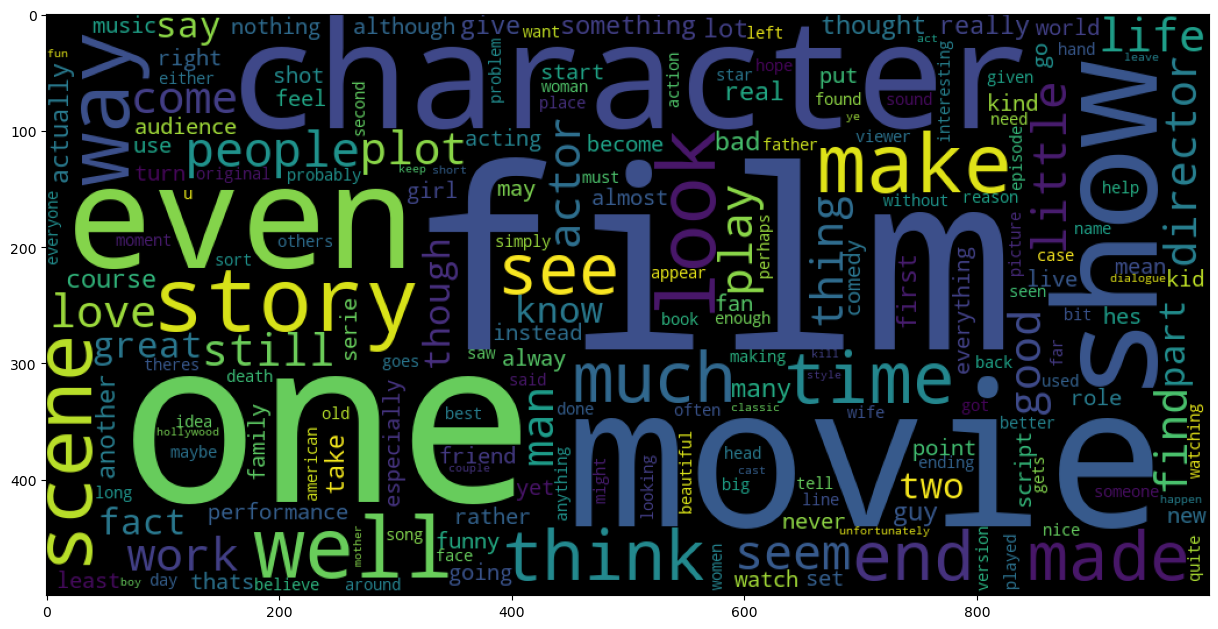

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(smooth_idf=True,max_features=300,ngram_range = (2,2),
                      token_pattern='(?u)\\b\\w\\w*\\b',
                     stop_words=stop_words)

In [ ]:
imdb_review.review=imdb_review.review.replace(to_replace='br', value="",regex=True)

In [ ]:
X_tfidf=tfidf.fit_transform(imdb_review.review)

In [ ]:
X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

In [ ]:
y=imdb_review.sentiment
X=X_tfidf

In [ ]:
X_tfidf.shape

(50000, 300)

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y=LabelEncoder().fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
clf=LazyClassifier()

In [ ]:
models,predictions=clf.fit(X_train,X_test,y_train,y_test)

 10%|████▌                                       | 3/29 [00:27<03:37,  8.36s/it]/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 34%|██████████████▊                            | 10/29 [02:

In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.70               0.70     0.70      0.70   
LogisticRegression                 0.70               0.70     0.70      0.69   
LinearDiscriminantAnalysis         0.69               0.69     0.69      0.69   
RidgeClassifierCV                  0.69               0.69     0.69      0.69   
RidgeClassifier                    0.69               0.69     0.69      0.69   
NearestCentroid                    0.69               0.69     0.69      0.69   
SVC                                0.69               0.69     0.69      0.69   
QuadraticDiscriminantAnalysis      0.69               0.69     0.69      0.68   
LGBMClassifier                     0.69               0.69     0.69      0.68   
BernoulliNB                        0.69               0.69     0.69      0.68   
GaussianNB                  